In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/Statcast_2019.csv')
df = df[['pitch_type', 'release_speed', 'balls','strikes', 'plate_x', 'plate_z','stand','p_throws']].dropna()
pitch = df.pitch_type.value_counts(normalize = True)[(df.pitch_type.value_counts(normalize = True)> 0.05)].index.tolist()
df = df[df.pitch_type.isin(pitch)]
df.loc[df.pitch_type == 'FF', 'pitch_type'] = 'Four-seam fastball'
df.loc[df.pitch_type == 'FC', 'pitch_type'] = 'Cutter'
df.loc[df.pitch_type == 'FT', 'pitch_type'] = 'Two-seam fastball'
df.loc[df.pitch_type == 'CH', 'pitch_type'] = 'Changeup'
df.loc[df.pitch_type == 'SL', 'pitch_type'] = 'Slider'
df.loc[df.pitch_type == 'CU', 'pitch_type'] = 'Curveball'
df.loc[df.pitch_type == 'SI', 'pitch_type'] = 'Sinker'


In [3]:
lefty_img=mpimg.imread('https://github.com/weiyut/Sports-Analytics/raw/main/Python%20Panel/Image/Lefty.png')
righty_img=mpimg.imread('https://github.com/weiyut/Sports-Analytics/raw/main/Python%20Panel/Image/Righty.png')

In [4]:
import panel as pn
import param
pn.extension()

In [5]:
class plateDash(param.Parameterized):
    Pitch = param.ObjectSelector(default = 'Four-seam fastball', objects = list(df.pitch_type.unique()))
    Balls = param.Integer(0, bounds=(0, 3))
    Strikes = param.Integer(0, bounds=(0, 2))
    Pitcher_1 = param.Selector(default = 'R', objects = ['R','L'])
    Pitcher = param.Selector(default = 'R', objects = ['R','L'])
    Batter_1 = param.Selector(default = 'R', objects = ['R','L'])
    Batter = param.Selector(default = 'R', objects = ['R','L'])
    
    def get_data(self):
        class_df = df[(df.balls == self.Balls)&(df.strikes == self.Strikes)&(df.stand == self.Batter)&(df.p_throws == self.Pitcher)&(df.pitch_type == self.Pitch)].copy()
        return class_df
    
    def plate(self):
        data = self.get_data()
        fig = plt.figure(figsize = (10,10))
        sns.scatterplot(x = 'plate_x', y = 'plate_z',alpha = min(500/data.shape[0],0.184), color = 'red', data = data)
        plt.plot(data.plate_x.mean(), data.plate_z.mean(), marker = 'o', markersize = '10', color = 'red')
        plt.xlim(-4,4)
        plt.ylim(-2, 6)
        if self.Batter == 'L':
            plt.imshow(lefty_img, alpha=0.8, extent=[-4.5, 4.5, -2.5, 6.5])
        else: 
            plt.imshow(righty_img, alpha=0.8, extent=[-4.5, 4.5, -2.5, 6.5])
        plt.vlines(0.83, 1.17,3.92)
        plt.vlines(-0.83, 1.17,3.92)
        plt.hlines(3.92,-0.83, 0.83)
        plt.hlines(1.17,-0.83, 0.83)
        plt.axis('off')
        plt.title(self.Pitcher+'HP v.s. '+self.Batter+'HB\n' + self.Pitch, fontsize = 20)
        plt.close()
        return fig

    def data_table(self):
        table = df[(df.balls == self.Balls)&(df.strikes == self.Strikes)&(df.stand == self.Batter)&(df.p_throws == self.Pitcher)].copy()
        data_tab = pd.DataFrame(table.pitch_type.value_counts(normalize = True).apply(lambda x:str(np.round(100*x,1))+'%')).rename(columns = {'pitch_type':'Usage'})
        return data_tab
        

In [6]:
pld = plateDash(name = '')
param = pn.Param(pld.param, widgets={
    'Pitcher_1':{'widget_type': pn.widgets.StaticText(name='Pitcher', value='')},
    'Pitcher':{'widget_type': pn.widgets.RadioButtonGroup},
    'Batter_1':{'widget_type': pn.widgets.StaticText(name='Batter', value='')},
    'Batter':{'widget_type': pn.widgets.RadioButtonGroup}})

In [7]:
dashboard = pn.Row(pn.Column(param,pld.data_table),
                   pld.plate            
)

Row
    [0] Column
        [0] Param(plateDash, widgets={'Pitcher_1': {'widget_typ...})
        [1] ParamMethod(method)
    [1] ParamMethod(method)
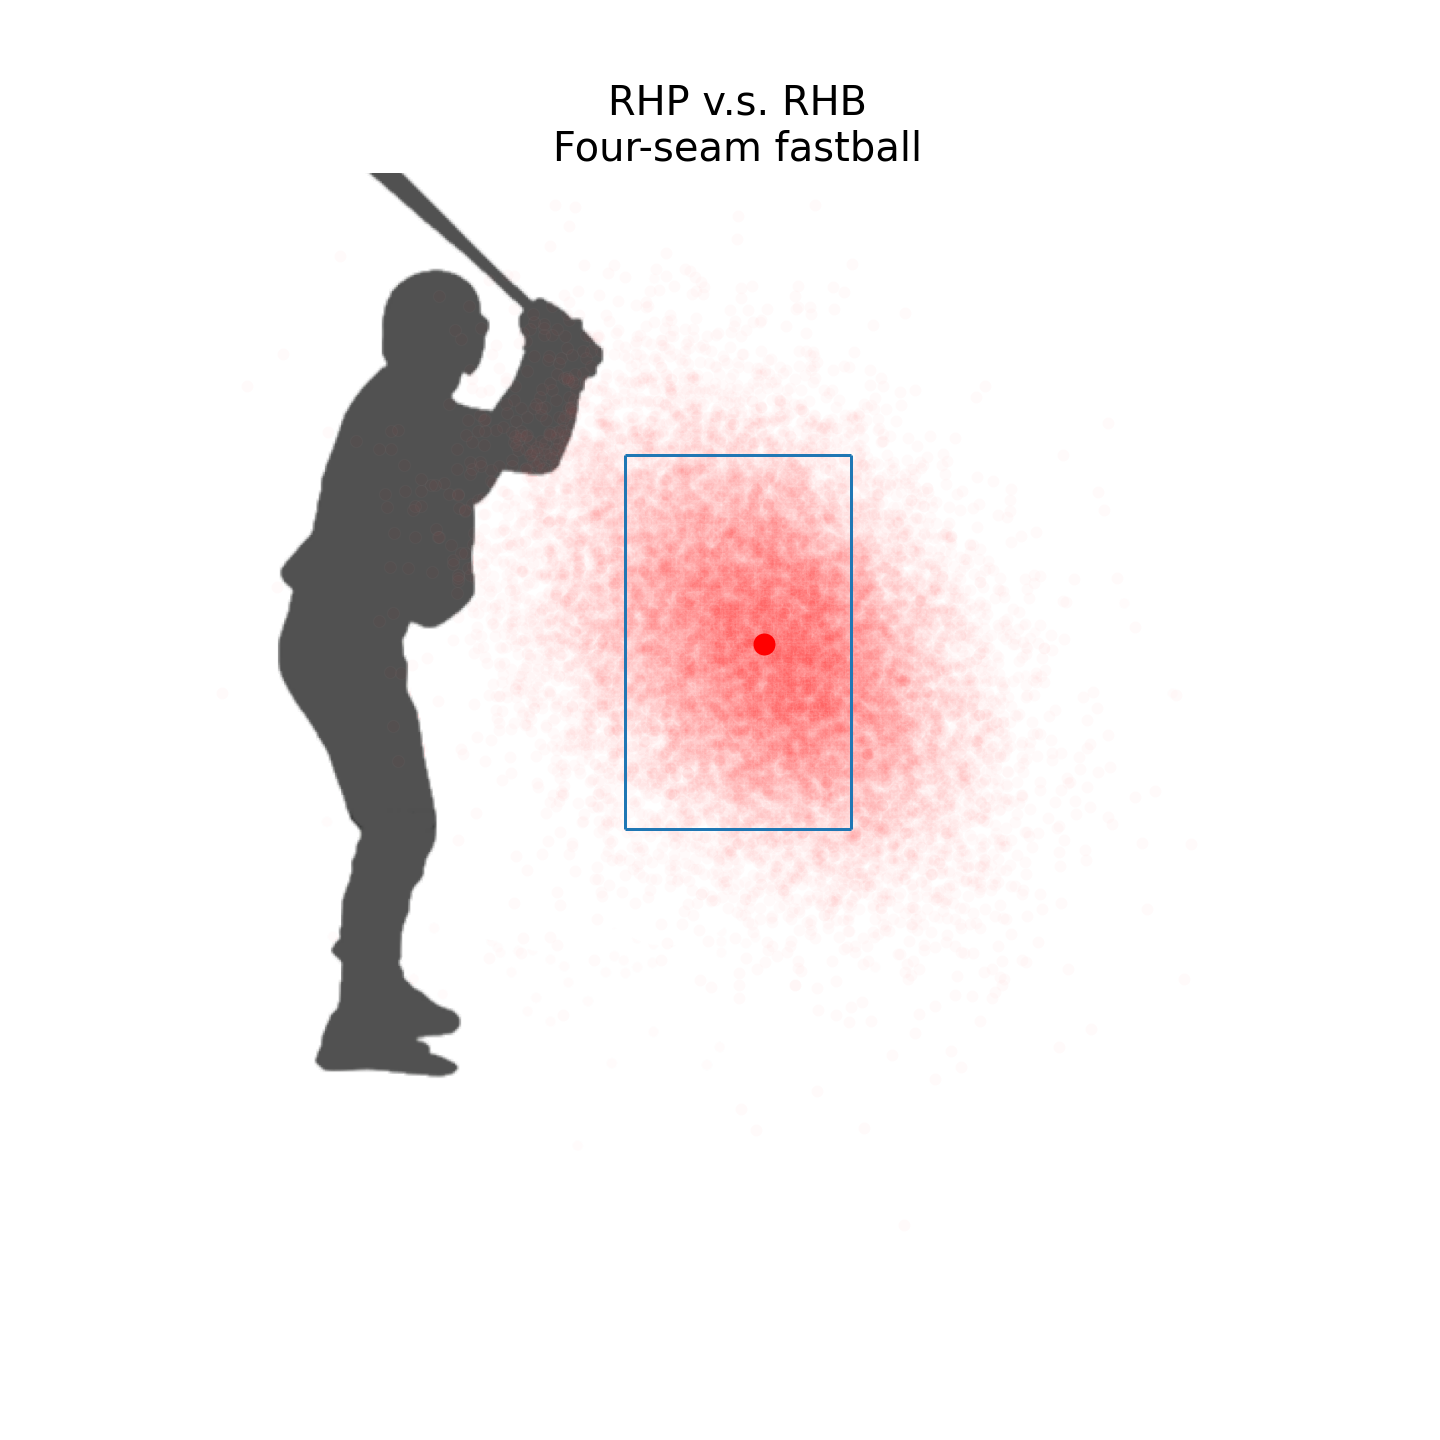

In [8]:
dashboard